This notebook will be some sketches of code.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

 

**Time to start!** 
First let's try to make an one-pole filter. This has the following difference equation:

$y[n] = b_0x[n] - a_1y[n-1]$



Text(0.5, 1.0, 'Audio signal')

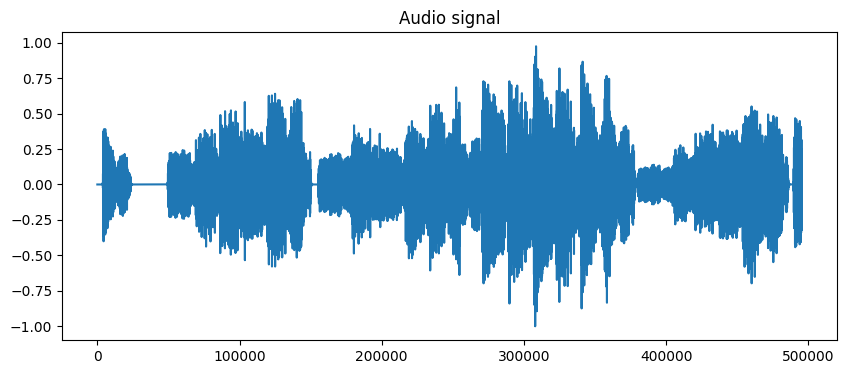

In [ ]:
#load audio file
fs, x = wavfile.read('Fabvrouw.wav')

x = x[:,0]
x = x / np.abs(x).max()

#plot audio signal
plt.figure(figsize = (10,4))
plt.plot(x)
plt.title('Audio signal')


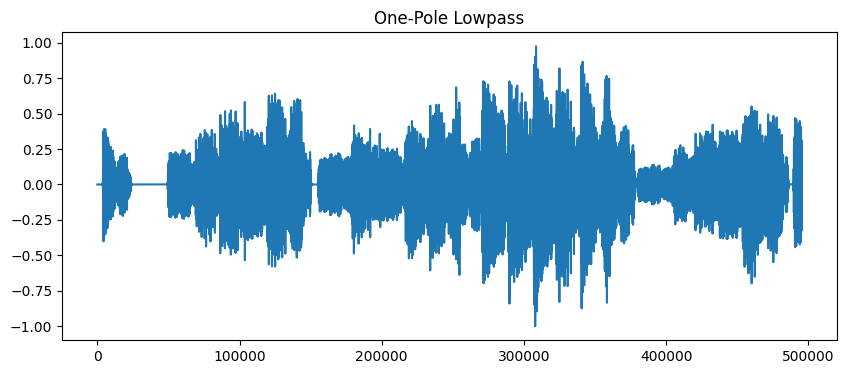

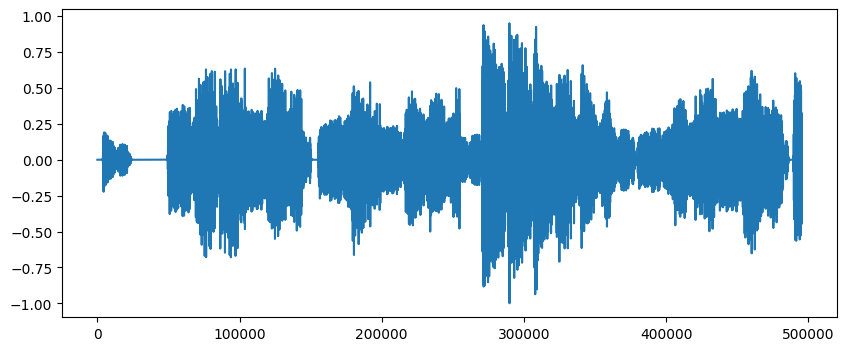

In [ ]:
#make filter
def one_pole_lowpass(x, fc, fs):
    a = np.exp(-2 * np.pi * fc / fs)
    y = np.zeros_like(x)
    for n in range(1, len(x)):
        y[n] = (1 - a) * x[n] + a * y[n - 1]
    return y


#apply filter 
y = one_pole_lowpass(x, fc=100, fs=fs)
y = y / np.abs(y).max()

plt.figure(figsize=(10,4))
plt.plot(x, label="input")
plt.title("One-Pole Lowpass")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(y, label="filtered")
plt.show()

wavfile.write("output_lpf.wav", fs, y)
